In [7]:
import torch
from torch import nn
from d2l import torch as d2l
import math

In [8]:
def corr2d(X, K):  #@save
    """Compute 2D cross-correlation."""
    h, w = K.shape
    Y = torch.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (X[i:i + h, j:j + w] * K).sum()
    return Y

1. Construct an image X with diagonal edges.
    1. What happens if you apply the kernel K in this section to it?
    2. What happens if you transpose X?
    3. What happens if you transpose K?

Construct an image X with diagonal edges:

In [9]:
X = torch.eye(6,8)
X

tensor([[1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.]])

(1) If I apply the kernel K to it:

In [10]:
K = torch.tensor([[1.0, -1.0]])
Y = corr2d(X, K)
Y

tensor([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [-1.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0., -1.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0., -1.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0., -1.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0., -1.,  1.,  0.]])

(2) If I transpose X:

In [11]:
corr2d(X.T, K)

tensor([[ 1.,  0.,  0.,  0.,  0.],
        [-1.,  1.,  0.,  0.,  0.],
        [ 0., -1.,  1.,  0.,  0.],
        [ 0.,  0., -1.,  1.,  0.],
        [ 0.,  0.,  0., -1.,  1.],
        [ 0.,  0.,  0.,  0., -1.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.]])

(3) If I transpose K:

In [12]:
corr2d(X, K.T)

tensor([[ 1., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1., -1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1., -1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1., -1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1., -1.,  0.,  0.]])

2. Design some kernels manually.
    1. Given a directional vector $\mathbf{v}=(v_1,v_2)$, derive an edge-detection kernel that detects edges orthogonal to $\mathbf{v}$, i.e., edges in the direction $(v_2, -v_1)$.
    2. Derive a finite difference operator for the second derivative. What is the minimum size of the convolutional kernel associated with it? Which structures in images respond most strongly to it?
    3. How would you design a blur kernel? Why might you want to use such a kernel?
    4. What is the minimum size of a kernel to obtain a derivative of order d?

(1) 

The derivative of one channel image at x direction is:  

$$G_x = I(i,j+1) - I(i,j)$$

The corresponding kernel can be:

$$G_x = \left[ \begin{matrix} -1 & 1 \\ -1 & 1 \\ \end{matrix} \right]$$

Similarly:

$$G_y = \left[ \begin{matrix}  1 & 1 \\ -1 & -1 \end{matrix} \right]$$

The derivative at direction $\theta$ is $cos\theta \cdot G_x + sin\theta \cdot G_y$. When we want to detect the edges orthogonal to $v$, we need to calculate the derivative along the direction of v. So $\theta = arctan(v_2, v_1)$

The kernel should be:

$$G_\theta = \left[ \begin{matrix} -cos\theta+sin\theta & cos\theta+sin\theta \\ -cos\theta-sin\theta & cos\theta-sin\theta\end{matrix}\right]$$

In [13]:
X = torch.eye(6,8)
K = torch.tensor([[0, math.sqrt(2)],[-math.sqrt(2), 0]])
corr2d(X, K)

tensor([[ 0.0000, -1.4142,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 1.4142,  0.0000, -1.4142,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  1.4142,  0.0000, -1.4142,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  1.4142,  0.0000, -1.4142,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  1.4142,  0.0000, -1.4142,  0.0000]])

(2)

The difference operator:

$$\begin{aligned}
\frac{\partial^2f}{\partial x^2}& =\quad\frac{\partial G_x}{\partial x} \\
&=\quad\frac{\partial\left(f[i,j+1]-f[i,j]\right)}{\partial x} \\
&=\quad\frac{\partial f[i,j+1]}{\partial x}-\frac{\partial f[i,j]}{\partial x} \\
&=\quad(f[i,j+2]-f[i,j+1])-(f[i,j+1]-f[i,j]) \\
&=\quad f[i,j+2]-2f[i,j+1]+f[i,j].
\end{aligned} $$

The minimal kernel:

$$K = [1 \ -2 \ 1]$$

Edge points respond strongly to it.

In [14]:
X = torch.zeros((10, 10))
X[3:7, 3:7] = 1
K = torch.tensor([[1,-2,1]])
print(X)
print(corr2d(X,K))

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1., 1., 1., 0., 0., 0.],
        [0., 0., 0., 1., 1., 1., 1., 0., 0., 0.],
        [0., 0., 0., 1., 1., 1., 1., 0., 0., 0.],
        [0., 0., 0., 1., 1., 1., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])
tensor([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1., -1.,  0.,  0., -1.,  1.,  0.],
        [ 0.,  1., -1.,  0.,  0., -1.,  1.,  0.],
        [ 0.,  1., -1.,  0.,  0., -1.,  1.,  0.],
        [ 0.,  1., -1.,  0.,  0., -1.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]

(3) 

A commonly used blur kernel is the Gaussian kernel, which is derived from the Gaussian distribution. The Gaussian kernel has the property of spreading out the pixel values around the central pixel, creating a gradual transition between neighboring pixels.

tensor([[0.0751, 0.1238, 0.0751],
        [0.1238, 0.2042, 0.1238],
        [0.0751, 0.1238, 0.0751]], dtype=torch.float64)


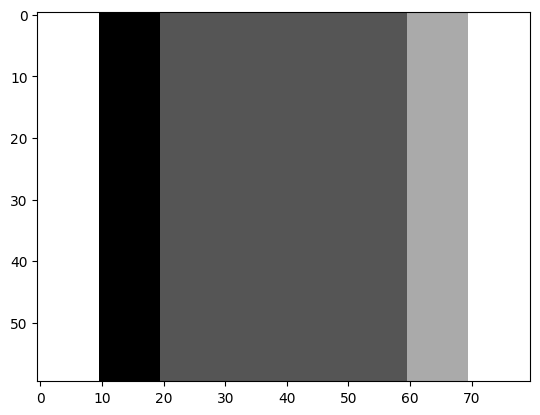

In [15]:
import numpy as np
import matplotlib.pyplot as plt
def gaussian_kernel(size, sigma):
    kernel = np.fromfunction(
        lambda x, y: (1/(2*np.pi*sigma**2)) * np.exp(-((x-size//2)**2 + (y-size//2)**2) / (2*sigma**2)),
        (size, size)
    )
    kernel /= np.sum(kernel)
    return kernel

kernel_size = 3
sigma = 1.0
blur_kernel = torch.tensor(gaussian_kernel(kernel_size, sigma))


print(blur_kernel)
X = torch.ones((60, 80))
X[:, 60:70] = 0.9
X[:, 20:60] = 0.8
X[:, 10:20] = 0.7
plt.imshow(X, cmap='gray')

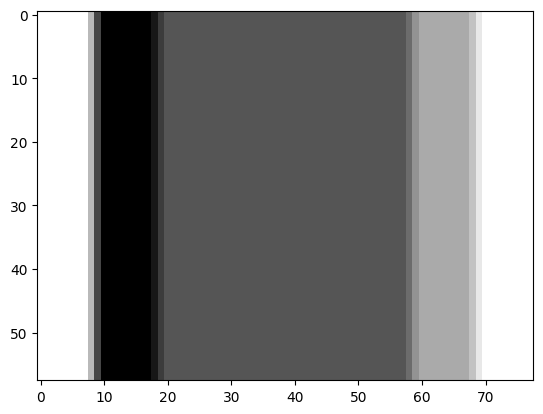

In [18]:
plt.imshow(corr2d(X, blur_kernel), cmap='gray')

Blurring can help reduce noise and unwanted artifacts in an image. Blurring can smooth out textures and fine details in an image.

(4)

d+1

3. When you try to automatically find the gradient for the Conv2D class we created, what kind of error message do you see?

In [17]:
class Conv2D(nn.Module):
    def __init__(self, kernel_size):
        super().__init__()
        self.weight = nn.Parameter(torch.rand(kernel_size))
        self.bias = nn.Parameter(torch.zeros(1))

    def forward(self, x):
        return corr2d(x, self.weight) + self.bias

x = torch.randn((8,8))
conv2d = Conv2D(kernel_size=(3,3))
x.requires_grad = True
output = conv2d(x)
output.backward()

RuntimeError: grad can be implicitly created only for scalar outputs

In [19]:
output.sum().backward()
print("Gradient of weight:", conv2d.weight.grad)
print("Gradient of bias:", conv2d.bias.grad)

Gradient of weight: tensor([[ 3.6885,  7.2449,  3.5503],
        [ 4.7501,  2.9634, -0.1371],
        [ 4.1237,  0.5337, -0.3826]])
Gradient of bias: tensor([36.])


We cannot implement `backward` method on a vector. But we can change it to a scalar and then get the gradient.

4. How do you represent a cross-correlation operation as a matrix multiplication by changing the input and kernel tensors?

For example K is 2x2, X is 3x3.

In order to do matrix multiplication, we first pad kernel K to the same size as X.

$$padK = \left[ \begin{matrix} k_1 & k_2 & 0 \\ k_3 & k_4 & 0 \\ 0 & 0 & 0 \end{matrix} \right]$$

The final output is O(2,2).  

O(0, 0) = padK.flatten * X.flatten.T

O(i, j) = padK.roll(i,j).flatten * X.flatten.T

O = (cat({padK.roll(i,j).flatten}) * X.flatten.T).reshape(2, 2)

In [21]:
import torch.nn.functional as F

def corr2d_matmul(X, K):
    pad_K = F.pad(K,(0, X.shape[1]-K.shape[1], 0, X.shape[0]-K.shape[0])).type(torch.float32)
    l = [] 
    for i in range(X.shape[0]-K.shape[0]+1):
        for j in range(X.shape[1]-K.shape[1]+1):
            l.append(torch.roll(pad_K,(i,j),(0,1)).reshape(1,-1))
    return (torch.cat(l,dim=0)@X.reshape(-1,1)).reshape(X.shape[0]-K.shape[0]+1,X.shape[1]-K.shape[1]+1)

K = torch.tensor([[1,1],[1,1]])
x = torch.ones(3,3)
(corr2d_matmul(x,K) == corr2d(x,K)).all()

tensor(True)